In [87]:
def from_rle_to_points(s):
    out = []
    s = s[:-1]
    s = s.split('$')
    for i in range(len(s)):
        x = 0
        y = i
        k = 1
        for j in range(len(s[i])):
            if s[i][j] not in ('bo'):
                k = int(s[i][j])
            else:
                for t in range(k):
                    x += 1
                    if s[i][j] =='o': out.append((x, y))
                k = 1
    return out 

near = lambda a,b: ((a,b+1),(a+1,b),(a,b-1),(a-1,b),  (a+1,b+1),(a+1,b-1),(a-1,b+1),(a-1,b-1))

def get_near_cells(c):
    out = set()
    for i in c:
        for j in near(*i):
            out.add(j)
    return out - c


def map_rule_once(cells):
    new_c = set()
    for i in cells:
        inters = set(near(*i)) & cells
        if len(inters) in (2,3):
            new_c.add(i)

    for i in get_near_cells(cells):
        inters = set(near(*i)) & cells
        if len(inters) == 3:
            new_c.add(i)
    
    return new_c
    
def get_n_generations(c, n):
    out = [c, ]
    for i in range(n-1):
        c = map_rule_once(c)
        out.append(c.copy())
    return out

def get_alive_once_c(s):
    out = set()
    for i in s:
        out = out | i
    return out

def get_connect_d(cells):
    nb = [0]*9
    for i in cells:
        k = len(set(near(*i)) & cells)
        nb[k] +=1
    return nb

def get_connect_d_beans(cells):
    nb = []
    for i in cells:
        k = len(set(near(*i)) & cells)
        nb.append(k)
    return nb

def get_rods(s):
    all_c = sorted(list(get_alive_once_c(s)))
    r = [[all_c[i],] for i in range(len(all_c))]
    for i in s:
        for j in all_c:
            if j in i:
                r[all_c.index(j)].append(1)
            else:
                r[all_c.index(j)].append(0)
    return r

def get_c_conncetions(rl, period):
    p = set(from_rle_to_points(rl))
    g = get_n_generations(p, period)
    s =  get_connect_d(get_alive_once_c(g))
    t = sum(s)
    return [i/t for i in s ]

def get_c_conncetions_beans(rl, period):
    p = set(from_rle_to_points(rl))
    g = get_n_generations(p, period)
    return get_connect_d_beans(get_alive_once_c(g))

rl = '2o$bo$bobo9b2o$2bobo8bo$11bobo$11b2o$5b2o$5b2ob2o$8b2o$2b2o$bobo$bo8bobo$2o9bobo$13bo$13b2o!'

# p = set(from_rle_to_points(rl))
# g = get_n_generations(p, 17)
# # rods = get_rods(g)
# print(get_connect_d(get_alive_once_c(g)))
# # print(len(rods[1]), rods)

print(get_c_conncetions(rl, 17))


[0.0, 0.0, 0.023255813953488372, 0.08527131782945736, 0.11627906976744186, 0.09302325581395349, 0.10852713178294573, 0.14728682170542637, 0.4263565891472868]


In [42]:
import json

periods = [[] for i in range(30)]

lines = []

with open('data2.txt') as f:
    lines = f.readlines()

for i in lines:
    p, d = i.split(';')
    p = int(p)
    d = d.rstrip('\n')
    periods[p].append(d)

print(periods[17][1])
t = list(map(len, periods))
print(t, sum(t))


2o$bo$bobo9b2o$2bobo8bo$11bobo$11b2o$5b2o$5b2ob2o$8b2o$2b2o$bobo$bo8bobo$2o9bobo$13bo$13b2o!
[0, 0, 0, 0, 94, 54, 44, 24, 36, 22, 19, 20, 34, 17, 16, 22, 26, 3, 23, 0, 15, 13, 14, 2, 32, 13, 6, 9, 20, 6] 584


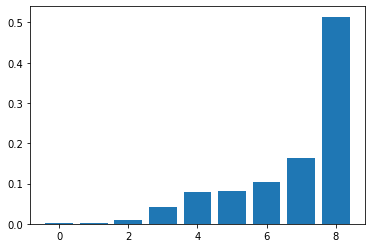

6


In [110]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


def get_dataset(p):
    data = np.zeros((9))

    per = 20
    tr = len(periods[per])

    for i in range(tr):
        rl = periods[per][i]
        dist1 = np.array(get_c_conncetions(rl, per))
        data += dist1
    return data/tr

P = 26

data = get_dataset(P)

# fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

fig, ax = plt.subplots()
dat = data
t = [i for i in range(len(dat))]
ax.bar(t, dat)
plt.show()
print(len(periods[P]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


AttributeError: ignored

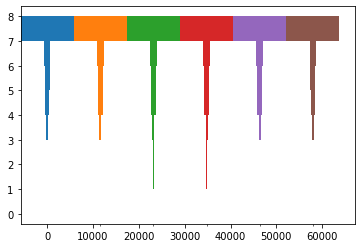

In [67]:
import numpy as np
import matplotlib.pyplot as plt

number_of_bins = 8


labels = [str(i) for i in range(4, 10)]
data_sets = [get_dataset(i) for  i in range(4, 10)]


hist_range = (np.min(data_sets), np.max(data_sets))
binned_data_sets = [
    np.histogram(d, range=hist_range, bins=number_of_bins)[0]
    for d in data_sets
]
binned_maximums = np.max(binned_data_sets, axis=1)
x_locations = np.arange(0, sum(binned_maximums), np.max(binned_maximums))

# The bin_edges are the same for all of the histograms
bin_edges = np.linspace(hist_range[0], hist_range[1], number_of_bins + 1)
heights = np.diff(bin_edges)
centers = bin_edges[:-1] + heights / 2

# Cycle through and plot each histogram
fig, ax = plt.subplots()
for x_loc, binned_data in zip(x_locations, binned_data_sets):
    lefts = x_loc - 0.5 * binned_data
    ax.barh(centers, binned_data, height=heights, left=lefts)

ax.set_xticks(x_locations, labels)


ax.set_ylabel("Data values")
ax.set_xlabel("Data sets")

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


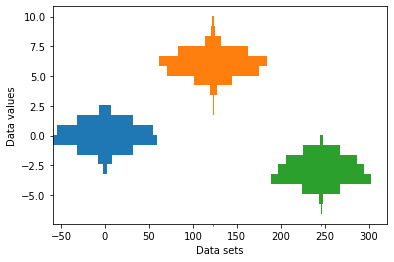

In [66]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)
number_of_bins = 20

# An example of three data sets to compare
number_of_data_points = 387
labels = ["A", "B", "C"]
data_sets = [np.random.normal(0, 1, number_of_data_points),
             np.random.normal(6, 1, number_of_data_points),
             np.random.normal(-3, 1, number_of_data_points)]

# Computed quantities to aid plotting
hist_range = (np.min(data_sets), np.max(data_sets))
binned_data_sets = [
    np.histogram(d, range=hist_range, bins=number_of_bins)[0]
    for d in data_sets
]
binned_maximums = np.max(binned_data_sets, axis=1)
x_locations = np.arange(0, sum(binned_maximums), np.max(binned_maximums))

# The bin_edges are the same for all of the histograms
bin_edges = np.linspace(hist_range[0], hist_range[1], number_of_bins + 1)
heights = np.diff(bin_edges)
centers = bin_edges[:-1] + heights / 2

# Cycle through and plot each histogram
fig, ax = plt.subplots()
for x_loc, binned_data in zip(x_locations, binned_data_sets):
    lefts = x_loc - 0.5 * binned_data
    ax.barh(centers, binned_data, height=heights, left=lefts)

ax.set_xticks(x_locations, labels)

ax.set_ylabel("Data values")
ax.set_xlabel("Data sets")

plt.show()